In [1]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import rcParams
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.family': 'sans-serif',
         'text.usetex': True}
rcParams.update(params)

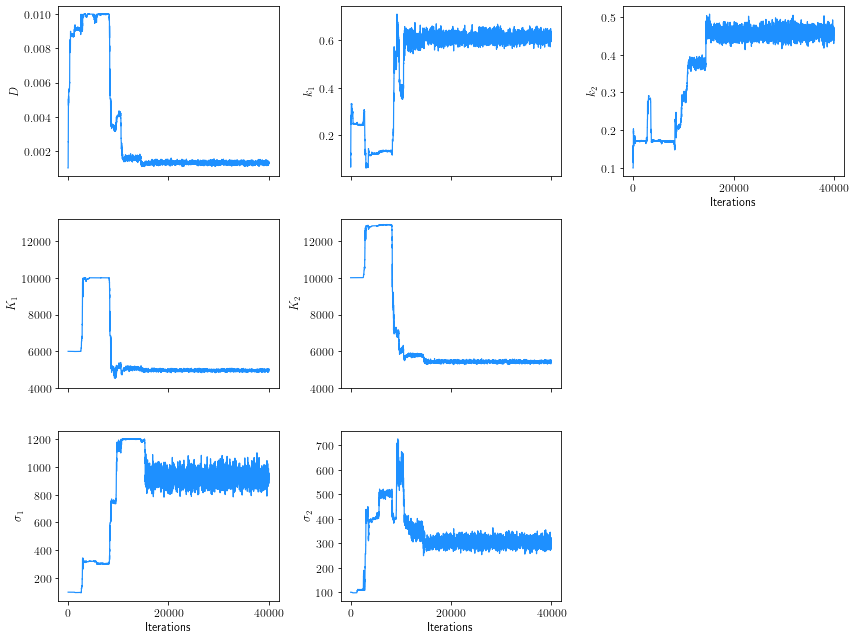

In [3]:
c1 = np.load('../Data/linear_chains_Heinrich.npy',allow_pickle = True)

its = [i for i in range(len(c1[0]))]
colors = ['steelblue','dodgerblue','skyblue']

fig,ax = plt.subplots(3,3,figsize = (12,9))

ax[0,0].plot(its,c1[0], color = 'dodgerblue',lw = 1.2)
ax[0,0].set_ylabel('$D$')
#ax[0,0].set_yscale('log')

ax[0,1].plot(its,c1[1], color = 'dodgerblue',lw = 1.2)
ax[0,1].set_ylabel('$k_1$')
#ax[0,1].set_yscale('log')

ax[0,2].plot(its,c1[2], color = 'dodgerblue',lw = 1.2)
ax[0,2].set_ylabel('$k_2$')
#ax[0,2].set_yscale('log')

ax[1,0].plot(its,c1[3], color = 'dodgerblue',lw = 1.2)
ax[1,0].set_ylabel('$K_1$')


ax[1,1].plot(its,c1[4], color = 'dodgerblue',lw = 1.2)
ax[1,1].set_ylabel('$K_2$')

ax[2,0].plot(its,c1[5], color = 'dodgerblue',lw = 1.2)
ax[2,0].set_ylabel('$\\sigma_1$')

ax[2,1].plot(its,c1[6], color = 'dodgerblue',lw = 1.2)
ax[2,1].set_ylabel('$\\sigma_2$')


for i in range(2):
    ax[0,i].set_xticklabels([])
    ax[1,i].set_xticklabels([])
    ax[1,i].set_xticks([0,20000,40000])
    ax[0,i].set_xticks([0,20000,40000])
    ax[2,i].set_xticks([0,20000,40000])

ax[0,2].set_xticks([0,20000,40000])
ax[1,-1].axis('off')



ax[1,1].set_ylim(4000,13200)
ax[1,0].set_ylim(4000,13200)


ax[2,1].set_xlabel('Iterations')
ax[2,0].set_xlabel('Iterations')
ax[0,2].set_xlabel('Iterations')
ax[-1,-1].axis('off')
plt.tight_layout()
#plt.savefig('chains_Heinrich.pdf')
plt.show()

In [4]:
init = 20000 # remove initial phase
conc_chain = c1[:,init:]
lims = np.array([[np.min(conc_chain[i]) - .12*(np.max(conc_chain[i]) - np.min(conc_chain[i])),np.max(conc_chain[i]) +  .12*(np.max(conc_chain[i]) - np.min(conc_chain[i]))] for i in range(7)])

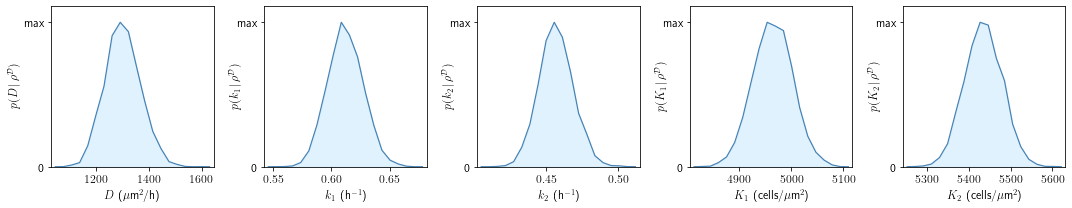

In [8]:
fig,ax = plt.subplots(1,5,figsize = (15,3))


ax[0].set_ylabel('$p(D\,|\,\\rho^\mathcal{D})$')
#ax[0,0].set_ylabel('$D$')
ax[1].set_ylabel('$p(k_1\,|\,\\rho^\mathcal{D})$',labelpad = -4)
ax[2].set_ylabel('$p(k_2\,|\,\\rho^\mathcal{D})$',labelpad = -4)
ax[3].set_ylabel('$p(K_1\,|\,\\rho^\mathcal{D})$',labelpad = -4)
ax[4].set_ylabel('$p(K_2\,|\,\\rho^\mathcal{D})$',labelpad = -4)

ax[1].set_xlabel('$k_1$ (h$^{-1}$)')
ax[2].set_xlabel('$k_2$ (h$^{-1}$)')
ax[3].set_xlabel('$K_1$ (cells/$\mu$m$^2$)')
ax[4].set_xlabel('$K_2$ (cells/$\mu$m$^2$)')
ax[0].set_xlabel('$D$ ($\mu$m$^2$/h)')

densities = []

for i in range(5):
    dens,bins = np.histogram(conc_chain[i],bins = 20, range = (lims[i][0],lims[i][1]))
    densities.append(dens)
    ax[i].set_yticks([0,1*np.max(dens)])
    ax[i].set_yticklabels([0,'max'])

    ax[i].set_xlim(lims[i][0]*(1 + (i==0)*1e6),lims[i][1]*(1 + (i==0)*1e6))
    ax[i].set_ylim(0,np.max(dens)*1.11)
    ax[i].plot(.5*(bins[1:] + bins[:-1])*(1 + (i==0)*1e6),dens, color = 'steelblue',lw = 1.2,label = 'Exponential growth')

    ax[i].fill_between(.5*(bins[1:] + bins[:-1])*(1 + (i==0)*1e6),dens, color = 'lightskyblue',alpha = .25)
plt.tight_layout()
#plt.savefig('posteriors_Heinrich.pdf')
plt.show()